In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('advertising.csv')
print(df)

     Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]


In [3]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [4]:
df.columns.str.match('Unnamed')

array([ True, False, False, False, False])

In [5]:
df=df.loc[:, ~df.columns.str.match('Unnamed')]

In [6]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.shape

(200, 4)

In [9]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

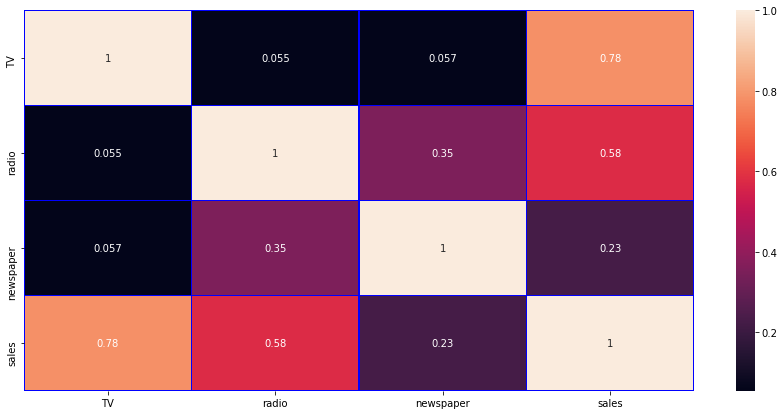

In [11]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='blue')

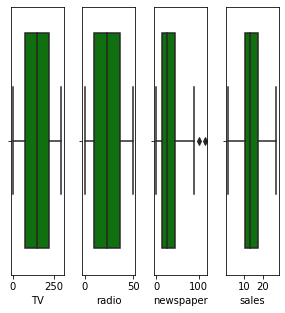

In [12]:
collist=df.columns.values
ncol=20
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='h')
    plt.tight_layout()

In [13]:
from scipy.stats import zscore
import numpy as np

In [14]:
z=np.abs(zscore(df.iloc[:,:-1]))
z

array([[9.69852266e-01, 9.81522472e-01, 1.77894547e+00],
       [1.19737623e+00, 1.08280781e+00, 6.69578760e-01],
       [1.51615499e+00, 1.52846331e+00, 1.78354865e+00],
       [5.20496822e-02, 1.21785493e+00, 1.28640506e+00],
       [3.94182198e-01, 8.41613655e-01, 1.28180188e+00],
       [1.61540845e+00, 1.73103399e+00, 2.04592999e+00],
       [1.04557682e+00, 6.43904671e-01, 3.24708413e-01],
       [3.13436589e-01, 2.47406325e-01, 8.72486994e-01],
       [1.61657614e+00, 1.42906863e+00, 1.36042422e+00],
       [6.16042873e-01, 1.39530685e+00, 4.30581584e-01],
       [9.45155670e-01, 1.17923146e+00, 2.92486143e-01],
       [7.90028350e-01, 4.96973404e-02, 1.22232878e+00],
       [1.43908760e+00, 7.99208859e-01, 1.62704048e+00],
       [5.78501712e-01, 1.05768905e+00, 1.07502697e+00],
       [6.66253447e-01, 6.50657027e-01, 7.11007392e-01],
       [5.64664612e-01, 1.65000572e+00, 1.02862691e+00],
       [9.25304978e-01, 9.00494200e-01, 3.84117072e+00],
       [1.56887609e+00, 1.10306

In [15]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [16]:
df_new=df[(z<3) .all(axis=1)]
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [17]:
print(df.shape)
print(df_new.shape)

(200, 4)
(198, 4)


In [18]:
loss_percent=(200-198)/200*100
print(loss_percent)

1.0


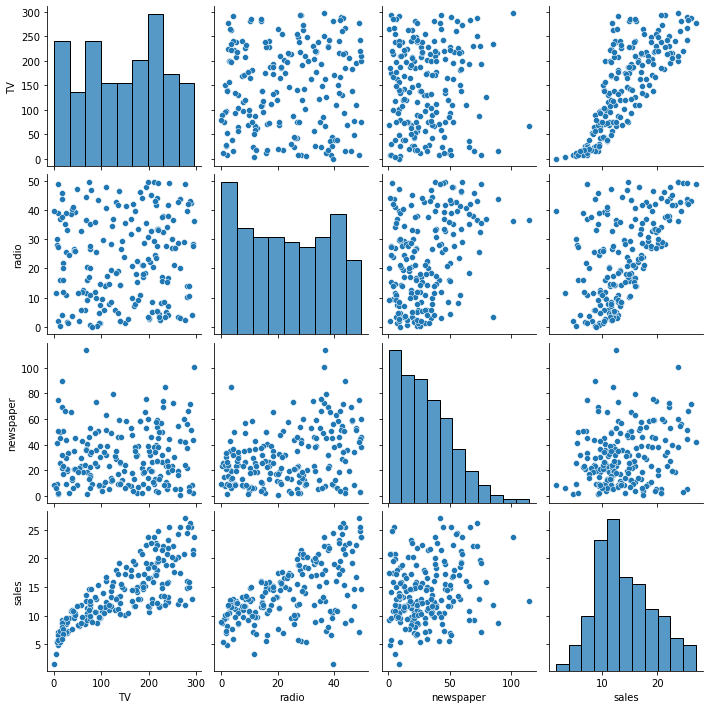

In [19]:
sns.pairplot(df)

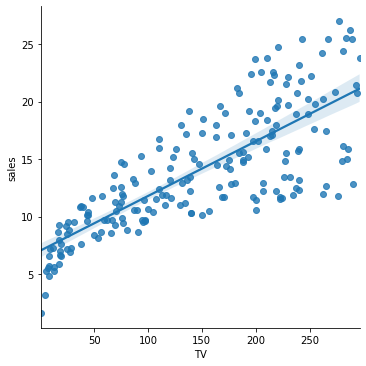

In [20]:
sns.lmplot('TV','sales',data=df)

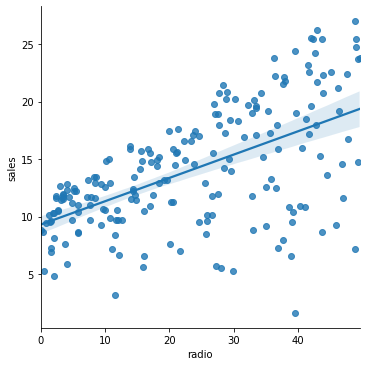

In [21]:
sns.lmplot('radio','sales',data=df)

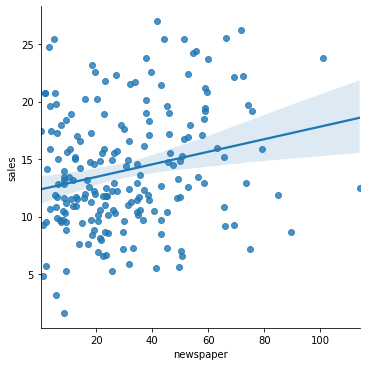

In [22]:
sns.lmplot('newspaper','sales',data=df)

In [23]:
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

it shows that newspaper is right skewed

<AxesSubplot:xlabel='TV', ylabel='Density'>

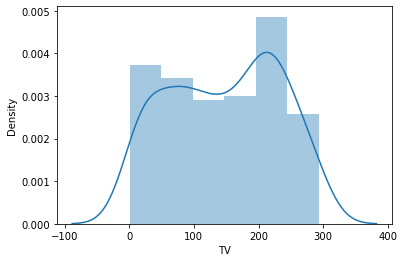

In [24]:
sns.distplot(df_new['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

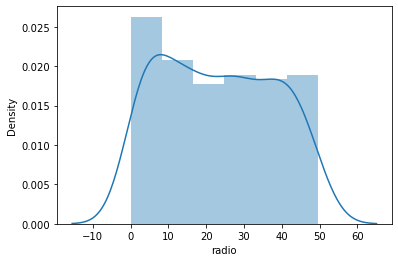

In [25]:
sns.distplot(df_new['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

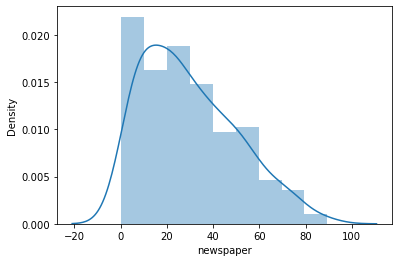

In [26]:
sns.distplot(df_new['newspaper'])

<AxesSubplot:xlabel='sales', ylabel='Density'>

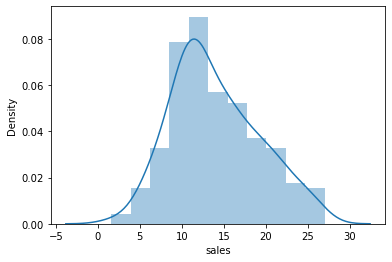

In [27]:
sns.distplot(df_new['sales'])

In [28]:
x=df_new.iloc[:,:-1]
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [29]:
y=df_new.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

In [30]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method="yeo-johnson")

In [31]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x=sd.fit_transform(x)
x

array([[ 0.95598306,  0.9691098 ,  1.6041965 ],
       [-1.19200349,  1.04623436,  0.83104401],
       [-1.6461253 ,  1.37296802,  1.60705249],
       [ 0.14293428,  1.1473316 ,  1.28376774],
       [ 0.45645241, -0.73502642,  1.28062154],
       [-1.8204008 ,  1.51543955,  1.76610727],
       [-1.00349358,  0.70309642, -0.10205346],
       [-0.20996049, -0.0876566 , -0.84968895],
       [-1.82264543, -1.62948287, -2.09866461],
       [ 0.652694  , -1.56152179, -0.22649933],
       [-0.88482761, -1.19258569, -0.06553382],
       [ 0.80322028,  0.19357553, -1.59608414],
       [-1.52567125,  0.82725998,  1.50859232],
       [-0.48090308, -1.01613619, -1.23269654],
       [ 0.69642374,  0.70856268,  0.86367455],
       [ 0.60769456,  1.45886692,  1.1026083 ],
       [ 1.44702338,  1.06152278,  1.19771741],
       [-0.84304109, -0.02834315, -0.39458775],
       [ 0.09676151,  0.18741189, -0.346834  ],
       [ 0.84017479,  0.41523303,  1.11921444],
       [ 1.02746612, -1.2660875 , -0.102

# Outcome has many variables so we use linear regression

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import accuracy_score
import sklearn
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [33]:
from sklearn.model_selection import train_test_split 

In [34]:
print(x.shape)
print(y.shape)

(198, 3)
(198,)


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [36]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
lr.fit(x_train,y_train)

(158, 3)
(158,)
(40, 3)
(40,)


LinearRegression()

In [37]:
lr.coef_

array([3.89837668, 2.68904188, 0.17724544])

In [38]:
lr.intercept_

13.993594765337395

In [39]:
lr.score(x_train,y_train)

0.9046797524787555

In [40]:
pred=lr.predict(x_test)
print("predicted result score:",pred)
print("actual score:",y_test)

predicted result score: [ 8.84311472 12.78317337 22.70140614  9.29361557  9.77774894 21.12774612
 19.39821597 12.30735272 14.81329126 17.48585261 14.96865583 20.48100361
  8.0741562  13.49245834  6.04639552  9.64431182  9.75740149 12.29889839
 10.12683515 12.06304047 13.41653013 17.30912117 22.37483905  5.97433294
 17.56280847 20.65288442  8.00667886 14.32118168  6.80447934 12.73379055
 18.17715625 14.31317972  5.74761434 14.25691599 15.00481264 18.08264582
 15.91872141 12.26800498 18.58386725 16.73752428]
actual score: 66      9.5
116    12.2
17     24.4
143    10.4
158     7.3
128    24.7
142    20.1
31     11.9
19     14.6
169    15.0
160    14.4
15     22.4
56      5.5
57     13.2
117     9.4
46     10.6
126     6.6
9      10.6
149    10.1
86     12.0
115    12.6
163    18.0
61     24.2
189     6.7
74     17.0
69     22.3
121     7.0
165    11.9
119     6.6
177    11.7
70     18.3
77     14.2
127     8.8
83     13.6
25     12.0
193    19.6
97     15.5
173    11.7
20     18.0
152   

In [41]:
print("error:")
print("mean absolute error:",mean_absolute_error(y_test,pred))
print("mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 1.2405739155967006
mean squared error: 2.6096391430662558
Root mean squared error: 1.6154377558625574


In [42]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9037853658665029


#Hyper tuning method

In [48]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.9046797491778825


array([3.89814168, 2.68887117, 0.17725521])

In [49]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
enrpred=ls.predict(x_test)
print(ls.score(x_train,y_train))
ls.coef_

0.9046797516311782


array([3.89828187, 2.68897841, 0.17717492])

In [50]:
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rdpred=rd.predict(x_test)
print(rd.score(x_train,y_train))

rd.coef_

0.9046797524784285


array([3.89837429, 2.68904016, 0.177246  ])

In [51]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.9017167653463861
0.743945581119801
0.9294535214387655


as per this kernel the svr giving the good result with rbf kernel

In [53]:
#cross validation

from sklearn.model_selection import cross_val_score

score=cross_val_score(lr,x,y,cv=5)
print(score)
print(score.min(),score.mean(),score.max(),score.std())

[0.89968003 0.92204966 0.9011748  0.86125637 0.89497463]
0.8612563694307063 0.8958270968555071 0.9220496592330181 0.019631238819825262


In [54]:
from sklearn.model_selection import KFold
kfold=KFold(10)

score=cross_val_score(lr,x,y,cv=kfold)
print(score)
print(score.min(),score.mean(),score.max(),score.std())

[0.91006721 0.87483741 0.92079897 0.9162975  0.91378641 0.88975158
 0.82997412 0.9283077  0.86194588 0.91244213]
0.8299741199321747 0.8958208927116633 0.9283077034428356 0.02976748051736195


In [55]:
from sklearn.model_selection import KFold
kfold=KFold(10)

score=cross_val_score(sv,x,y,cv=kfold)
print(score)
print(score.min(),score.mean(),score.max(),score.std())

[0.90579342 0.91066214 0.95595986 0.95767932 0.96748113 0.96224856
 0.81848023 0.93077012 0.95130681 0.92879859]
0.8184802339965456 0.9289180178558315 0.9674811288818916 0.04210195138393464


As per the cross validation the SVR model gives you the best result for the advertising  model

#Export Data

In [56]:
import pickle
filename="Abolone.pkl"
pickle.dump(sv,open(filename,'wb'))

In [58]:
import numpy as np
a=np.array(y_test)
predicted=np.array(sv.predict(x_test))
df_com=pd.DataFrame({'orginal':a,'predicted':predicted},index=range(len(a)))

In [59]:
df_com

,orginal,predicted
0,9.5,9.440445
1,12.2,12.672264
2,24.4,22.236706
3,10.4,10.286048
4,7.3,9.209021
5,24.7,18.792741
6,20.1,20.276940
7,11.9,12.313261
8,14.6,15.103807
9,15.0,14.793172
